In [7]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D,Activation,MaxPooling2D,Dropout,Dense,Flatten

In [8]:
# data from cat_dog_model file
x = np.load('x_data.npy')
y = np.load('y_data.npy')


In [9]:
X = x/255 # normalize the data

In [11]:
X.shape

(24946, 60, 60, 3)

In [13]:
model = Sequential()

model.add(Conv2D(64,(3,3),input_shape = X.shape[1:])) # [1:] means we skip the -1 or #24946 and (3,3) is the window size o kernel_size
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3))) # [1:] means we skip the -1 or #24946 and (3,3) is the window size o kernel_size
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3))) # [1:] means we skip the -1 or #24946 and (3,3) is the window size o kernel_size
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten()) # to flat the input before it go to Dense layer
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer = 'adam',
             metrics=['accuracy'])

model.fit(X,y, batch_size = 32,epochs = 10,validation_split = 0.1)

Train on 22451 samples, validate on 2495 samples
Epoch 1/10
 2400/22451 [==>...........................] - ETA: 4:53 - loss: 0.6941 - acc: 0.5158

KeyboardInterrupt: 

# Model

In [ ]:
import tensorflow as tf
from keras.callbacks import TensorBoard
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D,Activation,MaxPooling2D,Dropout,Dense,Flatten
import time

NAME = "CAT_DOG_CLASSIFICATION_KERAS-{}".format(int(time.time()))
                                              
tensorboard = TensorBoard(log_dir = 'logs/{}'.format(NAME))                                              
                                              
# data from cat_dog_model file
x = np.load('x_data.npy')
y = np.load('y_data.npy')

X = x/255.0 # normalize the data

model = Sequential()

model.add(Conv2D(64,(3,3),input_shape = X.shape[1:])) # [1:] means we skip the -1 or #24946 and (3,3) is the window size o kernel_size
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3))) # [1:] means we skip the -1 or #24946 and (3,3) is the window size o kernel_size
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3))) # [1:] means we skip the -1 or #24946 and (3,3) is the window size o kernel_size
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten()) # to flat the input before it go to Dense layer
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer = 'adam',
             metrics=['accuracy'])

model.fit(X,y, batch_size = 32,epochs = 10,validation_split = 0.1,callbacks=[tensorboard],)


In [2]:
import tensorflow as tf
from keras.callbacks import TensorBoard
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D,Activation,MaxPooling2D,Dropout,Dense,Flatten
import time

#NAME = "CAT_DOG_CLASSIFICATION_KERAS-{}".format(int(time.time()))
                                              
#tensorboard = TensorBoard(log_dir = 'logs/{}'.format(NAME))                                              
                                              
# data from cat_dog_model file
x = np.load('x_data.npy')
y = np.load('y_data.npy')

X = x/255.0 # normalize the data


dense_layers = [0]
layer_sizes = [64]
conv_layers = [3]

i = 1
for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv_{}-layer_{}-dense_{}".format(conv_layer,layer_size,dense_layer,int(time.time()))
            #tensorboard = TensorBoard(log_dir = 'logs/{}'.format(NAME))                                              
            print(NAME)
            print(i)
            i+=1
            print(NAME)
            model = Sequential()

            # we put this conv layer outside because first layer needs a input_size
            model.add(Conv2D(layer_size,(3,3),input_shape = X.shape[1:])) # [1:] means we skip the -1 or #24946 and (3,3) is the window size o kernel_size
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2,2)))

            for i in range(conv_layer-1):
                model.add(Conv2D(layer_size,(3,3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2,2)))



            model.add(Flatten()) # to flat the input before it go to Dense layer(converts 3d featurer map to 1D feature vector)

            for l in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))


            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            model.compile(loss='binary_crossentropy',
                       optimizer = 'adam',
                       metrics=['accuracy'])

            model.fit(X,y, batch_size = 32,epochs = 7,validation_split = 0.1)
model.save("64x3-CNN.model")

Using TensorFlow backend.


3-conv_64-layer_0-dense_1552532500
1
3-conv_64-layer_0-dense_1552532500
Train on 22451 samples, validate on 2495 samples
Epoch 1/7
22451/22451 [==============================] - 419s 19ms/step - loss: 0.6030 - acc: 0.6663 - val_loss: 0.6053 - val_acc: 0.6762
Epoch 2/7
22451/22451 [==============================] - 315s 14ms/step - loss: 0.4916 - acc: 0.7646 - val_loss: 0.4573 - val_acc: 0.7852
Epoch 3/7
22451/22451 [==============================] - 318s 14ms/step - loss: 0.4367 - acc: 0.7946 - val_loss: 0.4327 - val_acc: 0.8032
Epoch 4/7
22451/22451 [==============================] - 310s 14ms/step - loss: 0.3936 - acc: 0.8206 - val_loss: 0.4086 - val_acc: 0.8088
Epoch 5/7
22451/22451 [==============================] - 311s 14ms/step - loss: 0.3563 - acc: 0.8401 - val_loss: 0.3805 - val_acc: 0.8248
Epoch 6/7
22451/22451 [==============================] - 306s 14ms/step - loss: 0.3230 - acc: 0.8591 - val_loss: 0.4083 - val_acc: 0.8196
Epoch 7/7
22451/22451 [============================

In [4]:
from tf.keras.models.load_model("64x3-CNN.model")

SyntaxError: invalid syntax (<ipython-input-4-05bf6dc456b6>, line 1)

In [5]:
import keras
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [43]:
categories = ['Cat','Dog']
def prepare(img):
    img_size = 60
    img = cv2.imread(img)
    re_img = cv2.resize(img,(img_size,img_size))
    re_shape = re_img.reshape(-1,img_size,img_size,3)
    plt.imshow(re_img)
    return re_shape

In [44]:
model = keras.models.load_model("64x3-CNN.model")

Dog


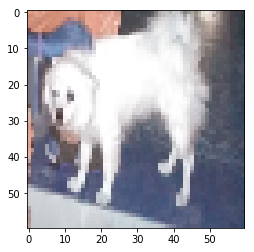

In [45]:

pred = model.predict([prepare('tuffi.jpg')])
print(categories[int(pred[0][0])])